
## Mengkoneksikan Colab dengan Gdrive

In [1]:
# Mengakses link ke google drive
# from google.colab import drive
# drive.mount('/content/gdrive')

## Import Packages



In [2]:
# Import Packages
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

## Setting Path & Check Directory

In [3]:
# im using local env

## Import Data

lakukan import data customer_clean.csv, transaction_clean.csv, product_clean.csv

In [14]:
df1 = pd.read_csv('customer.csv')
df2 = pd.read_csv('transaction_clean.csv')
df3 = pd.read_csv('product.csv')

df3.columns

Index(['product_id', 'product_group', 'product_category', 'product_type',
       'product', 'product_description', 'unit_of_measure',
       'current_wholesale_price', 'current_retail_price', 'tax_exempt_yn',
       'promo_yn', 'new_product_yn'],
      dtype='object')

# Case 1

Home store mana yang banyak mendapatkan customer?

In [5]:
print(df1.head())
df1['customer_id'].nunique()

   customer_id  home_store customer_first-name        customer_email  \
0            1           3           Kelly Key  Venus@adipiscing.edu   
1            2           3     Clark Schroeder        Nora@fames.gov   
2            3           3      Elvis Cardenas    Brianna@tellus.edu   
3            4           3        Rafael Estes           Ina@non.gov   
4            5           3          Colin Lynn      Dale@Integer.com   

  customer_since loyalty_card_number   birthdate gender  birth_year  
0     2017-01-04        908-424-2890  1950-05-29      M        1950  
1     2017-01-07        032-732-6308  1950-07-30      M        1950  
2     2017-01-10        459-375-9187  1950-09-30      M        1950  
3     2017-01-13        576-640-9226  1950-12-01      M        1950  
4     2017-01-15        344-674-6569  1951-02-01      M        1951  


2246

In [6]:
totalsales = df1.groupby('home_store')['customer_id'].count()
print(totalsales)

home_store
3    800
5    945
8    501
Name: customer_id, dtype: int64


# Case 2

Distribusi umur dari masing-masing home store menggunakan boxplot  

In [7]:
# membuat kolom baru untuk distribusi umur
curyear = dt.today().year
df1['umur'] = curyear - df1['birth_year']

<Axes: xlabel='home_store', ylabel='umur'>

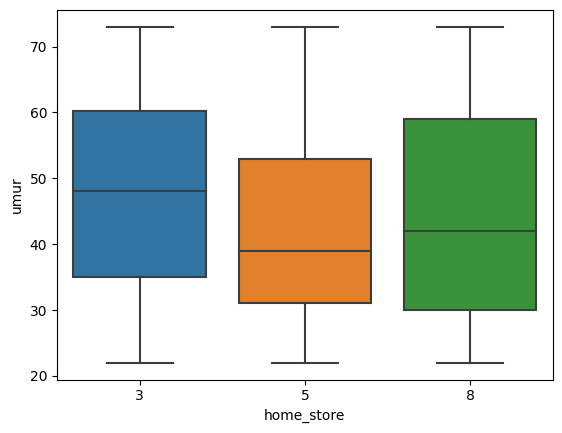

In [8]:
# membuat boxplot
sns.boxplot(x='home_store',y='umur',data=df1)

# Case 3

Berapakah proporsi dari transaksi yang memanfaatkan promo dan tidak?

In [9]:
# melakukan cleaning data pada kolom yang tidak diperlukan
df2 = df2.drop(columns=['Unnamed: 0'])
df2.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01 00:00:00,2021-07-18 12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01 00:00:00,2021-07-18 15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01 00:00:00,2021-07-18 14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01 00:00:00,2021-07-18 16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01 00:00:00,2021-07-18 19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


<Axes: xlabel='promo_item_yn', ylabel='transaction_id'>

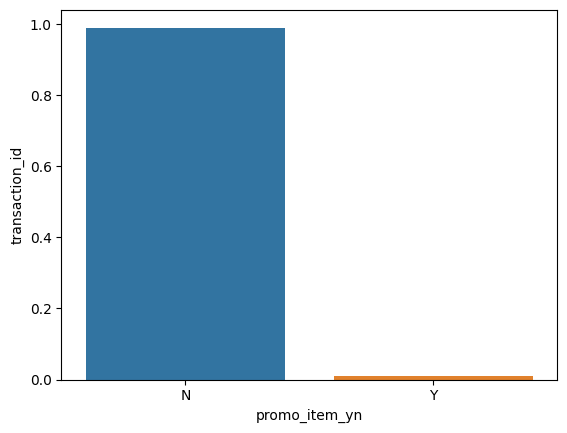

In [10]:
promoCheck = df2.groupby('promo_item_yn')['transaction_id'].count()
promoCheck2 = (promoCheck/promoCheck.sum()).reset_index()
sns.barplot(data = promoCheck2, x = 'promo_item_yn', y = 'transaction_id')

# Case 4

Distribusi quantity dari transaksi di masing-masing home store

In [11]:
# mengganti tipe data pada kolom tertentu
changeColumn = ['transaction_id','sales_outlet_id','staff_id','product_id','line_item_id']
for x in changeColumn :
      df2[x] = df2[x].astype(str)

changeColumn = ['transaction_date','transaction_time']
for x in changeColumn :
      df2[x] = pd.to_datetime(df2[x])

df2.dtypes

transaction_id              object
transaction_date    datetime64[ns]
transaction_time    datetime64[ns]
sales_outlet_id             object
staff_id                    object
customer_id                  int64
instore_yn                  object
order                        int64
line_item_id                object
product_id                  object
quantity                     int64
line_item_amount           float64
unit_price                 float64
promo_item_yn               object
dtype: object

In [12]:
# merge df1 dan df2
merger = pd.merge(df2, df1, left_on = 'customer_id', right_on = 'customer_id', how = 'left')
merger

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,umur
0,7,2019-04-01,2021-07-18 12:04:43,3,12,558,N,1,1,52,...,N,3.0,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983.0,40.0
1,11,2019-04-01,2021-07-18 15:54:39,3,17,781,N,1,1,27,...,N,3.0,Luke Patel,Herrod@Maecenas.us,2018-11-02,653-218-9979,1991-07-29,N,1991.0,32.0
2,19,2019-04-01,2021-07-18 14:34:59,3,17,788,Y,1,1,46,...,N,3.0,Hilel Ballard,Rajah@risus.org,2018-12-30,263-826-9026,1995-02-23,N,1995.0,28.0
3,32,2019-04-01,2021-07-18 16:06:04,3,12,683,N,1,1,23,...,N,3.0,Zephr Zimmerman,Dacey@in.net,2019-03-04,741-320-7166,1999-02-06,F,1999.0,24.0
4,33,2019-04-01,2021-07-18 19:18:37,3,17,99,Y,1,1,34,...,N,3.0,Orlando Shields,Ivory@scelerisque.us,2017-10-01,747-164-4596,1967-01-29,M,1967.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,2021-07-18 16:51:58,8,42,0,N,1,1,30,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49890,756,2019-04-29,2021-07-18 16:51:14,8,42,8412,Y,1,1,25,...,N,8.0,Malcolm,Cedric@neque.us,2019-01-08,193-832-1350,1953-09-16,M,1953.0,70.0
49891,759,2019-04-29,2021-07-18 11:17:36,8,15,0,Y,1,1,31,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49892,763,2019-04-29,2021-07-18 15:45:52,8,45,8030,N,1,1,44,...,N,8.0,Deirdre,Austin@Nullam.edu,2018-08-23,383-091-4412,1994-01-10,F,1994.0,29.0


<Axes: xlabel='home_store', ylabel='quantity'>

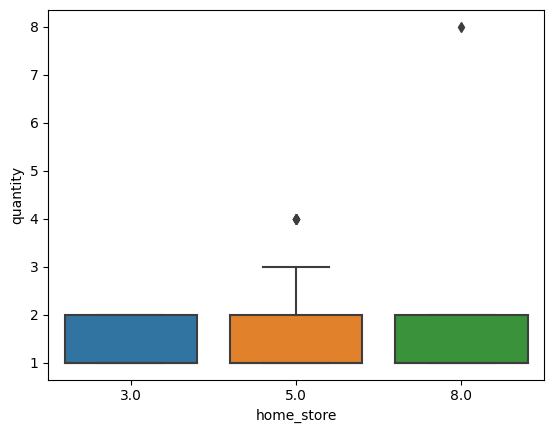

In [13]:
# membuat boxplot
sns.boxplot(data = merger, x ='home_store', y = 'quantity')